<a href="https://colab.research.google.com/github/iqrasarwar/ComputerVision/blob/main/midsPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

1102500
0
255


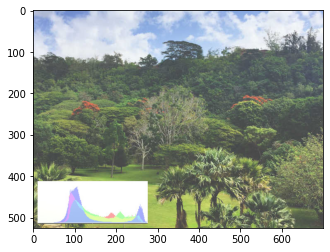

In [ ]:
im = plt.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/low.jpg")
min = im.min()
mx = im.max()
print(im.size)
print(min)
print(mx)
plt.imshow(im)

In [ ]:
#HISTOGRM EQULIZTION
import math 
img = np.array([[3,2,4,5],
       [7,7,8,2],
       [3,1,2,3],
       [5,4,6,7]])
print(type(img))
freq = np.ones(8)
cp = np.ones(8)
for i in range(8):
 freq[i]= np.count_nonzero(img == i+1)
 freq[i] = (freq[i]*1.0)/16.0
 if i>0:
  cp[i]= (cp[i-1]+freq[i])
 else:
   cp[i] = freq[i]
for i in range(8):
  cp[i]=math.floor(cp[i]*20)
for i in range(8):
 np.place(img, img == i, cp[i])
print(img)

<class 'numpy.ndarray'>
[[11  8 13 15]
 [20 20  8  8]
 [11 15  8 11]
 [15 13 18 20]]


In [ ]:
def equlized(im):
  imc = im.copy()
  freq = np.ones(255)
  cp = np.ones(255)
  for i in range(255):
    freq[i]= np.count_nonzero(im == i+1)
    freq[i] = (freq[i]*1.0)/151110
    if i>0:
      cp[i]= (cp[i-1]+freq[i])
    else:
      cp[i] = freq[i]
  for i in range(255):
    cp[i]=math.floor(cp[i]*255)
  for i in range(255):
    np.place(imc, imc == i, cp[i])
  return imc

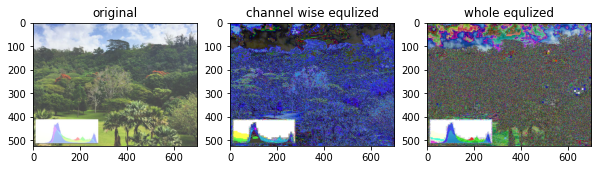

In [ ]:
eq,eq1 = im.copy(),im.copy()
eq[:,:,0] = equlized(im[:,:,0])
eq[:,:,1] = equlized(im[:,:,1])
eq[:,:,2] = equlized(im[:,:,2])
eq1 = equlized(im)
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3,1)
plt.title("original")
plt.imshow(im)
fig.add_subplot(1,3,2)
plt.title("channel wise equlized")
plt.imshow(eq)
fig.add_subplot(1,3,3)
plt.title("whole equlized")
plt.imshow(eq1)

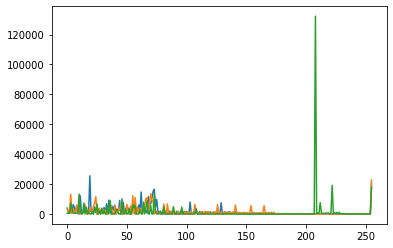

In [ ]:
# chhnel wise
hist1 = cv.calcHist([eq],[0],None,[256],[0,256])
hist2 = cv.calcHist([eq],[1],None,[256],[0,256])
hist3 = cv.calcHist([eq],[2],None,[256],[0,256])

plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)

plt.savefig("dim_hist.png")
plt.show()

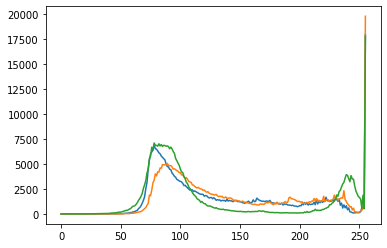

In [ ]:
# orignl
hist1 = cv.calcHist([im],[0],None,[256],[0,256])
hist2 = cv.calcHist([im],[1],None,[256],[0,256])
hist3 = cv.calcHist([im],[2],None,[256],[0,256])

plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)

plt.savefig("dim_hist.png")
plt.show()

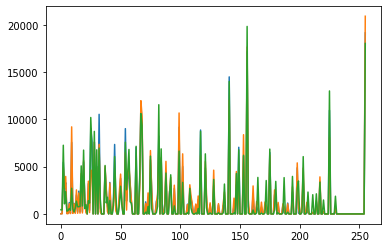

In [ ]:
# whole wise equ
hist1 = cv.calcHist([eq1],[0],None,[256],[0,256])
hist2 = cv.calcHist([eq1],[1],None,[256],[0,256])
hist3 = cv.calcHist([eq1],[2],None,[256],[0,256])

plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)

plt.savefig("dim_hist.png")
plt.show()

In [ ]:
imm = im.copy()
imm[:,:,0] = cv.equalizeHist(im[:,:,0])
imm[:,:,1] = cv.equalizeHist(im[:,:,1])
imm[:,:,2] = cv.equalizeHist(im[:,:,2])

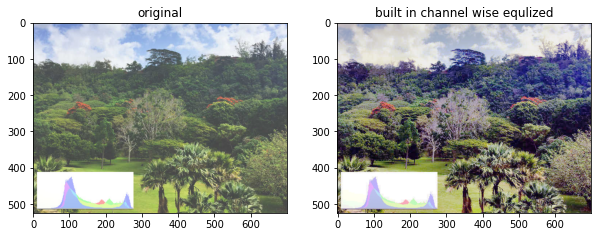

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.title("original")
plt.imshow(im)
fig.add_subplot(1,2,2)
plt.title("built in channel wise equlized")
plt.imshow(imm)

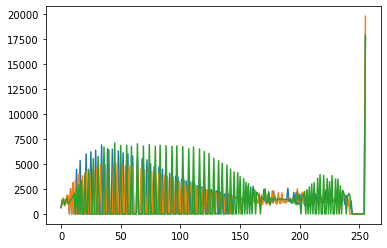

In [ ]:
# built in equ
hist1 = cv.calcHist([imm],[0],None,[256],[0,256])
hist2 = cv.calcHist([imm],[1],None,[256],[0,256])
hist3 = cv.calcHist([imm],[2],None,[256],[0,256])

plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)

plt.savefig("dim_hist.png")
plt.show()

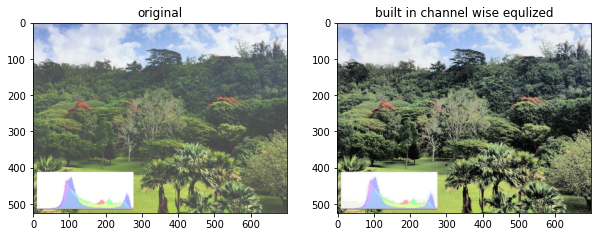

In [ ]:
img_yuv = cv.cvtColor(im,cv.COLOR_RGB2YUV)
img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])
hist_eq = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.title("original")
plt.imshow(im)
fig.add_subplot(1,2,2)
plt.title("built in channel wise equlized")
plt.imshow(hist_eq)

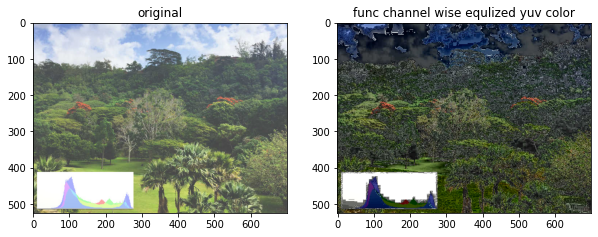

In [ ]:
img_yuv = cv.cvtColor(im,cv.COLOR_RGB2YUV)
img_yuv[:,:,0] = equlized(img_yuv[:,:,0])
hist_eq = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.title("original")
plt.imshow(im)
fig.add_subplot(1,2,2)
plt.title("func channel wise equlized yuv color")
plt.imshow(hist_eq)